# Import necessary libraries

In [0]:
# Import the Pandas library
import pandas as pd 
# Read in the raw temperature and emissions datasets (they are in CSV format) 
raw_t = pd.read_csv('GLB.Ts+dSST.csv', skiprows=1)
raw_e = pd.read_csv('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_103958.csv', skiprows=4)

In [6]:
print(raw_t.head())
print(raw_e.head())

   Year   Jan   Feb   Mar   Apr   May  ...   J-D   D-N   DJF   MAM   JJA   SON
0  1880 -0.29 -0.18 -0.11 -0.20 -0.12  ...  -.19   ***   *** -0.14  -.18  -.20
1  1881 -0.16 -0.17  0.04  0.04  0.02  ...  -.10  -.11  -.18  0.03  -.10  -.19
2  1882  0.14  0.15  0.03 -0.19 -0.16  ...  -.11  -.10   .06 -0.10  -.17  -.17
3  1883 -0.32 -0.39 -0.13 -0.17 -0.20  ...  -.19  -.20  -.32 -0.17  -.12  -.19
4  1884 -0.16 -0.08 -0.37 -0.43 -0.37  ...  -.29  -.28  -.13 -0.39  -.34  -.27

[5 rows x 19 columns]
  Country Name Country Code  ... 2018 Unnamed: 63
0        Aruba          ABW  ...  NaN         NaN
1  Afghanistan          AFG  ...  NaN         NaN
2       Angola          AGO  ...  NaN         NaN
3      Albania          ALB  ...  NaN         NaN
4      Andorra          AND  ...  NaN         NaN

[5 rows x 64 columns]


In [7]:
raw_t = raw_t.iloc[:,:13]
raw_t.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29


In [8]:
raw_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 13 columns):
Year    140 non-null int64
Jan     140 non-null float64
Feb     140 non-null float64
Mar     140 non-null float64
Apr     140 non-null float64
May     140 non-null float64
Jun     140 non-null float64
Jul     140 non-null float64
Aug     140 non-null object
Sep     140 non-null object
Oct     140 non-null object
Nov     140 non-null object
Dec     140 non-null object
dtypes: float64(7), int64(1), object(5)
memory usage: 14.3+ KB


In [9]:
raw_t.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,1949.5000,0.026929,0.045214,0.058643,0.031714,0.020500,0.007571,0.030786
std,40.5586,0.397979,0.401116,0.397197,0.371907,0.355115,0.347092,0.326076
min,1880.0000,-0.800000,-0.610000,-0.600000,-0.600000,-0.560000,-0.530000,-0.540000
25%,1914.7500,-0.272500,-0.240000,-0.240000,-0.262500,-0.250000,-0.245000,-0.210000
50%,1949.5000,-0.025000,-0.040000,-0.015000,-0.045000,-0.050000,-0.065000,-0.045000
75%,1984.2500,0.282500,0.342500,0.275000,0.262500,0.260000,0.200000,0.202500
max,2019.0000,1.150000,1.350000,1.310000,1.070000,0.910000,0.860000,0.900000


In [10]:
# Create new dataframe with an index for each month
# First create the date range
date_rng = pd.date_range(start='1/1/1880', end='1/03/2019', freq='M')

type(date_rng[0])
### returns 
### pandas._libs.tslibs.timestamps.Timestamp

# Next create the empty DataFrame, which we will populate using the actual data
t = pd.DataFrame(date_rng, columns=['date'])

# Create a column for the anomoly values
t['Avg_Anomaly_deg_C'] = None

# Set the index of the DataFrame to the date column (DateTime index)
t.set_index('date', inplace=True)

# Show the first few elements
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,None
1880-02-29,None
1880-03-31,None
1880-04-30,None
1880-05-31,None


In [11]:
# Import relevant libraries
import calendar
from datetime import datetime

# Function definition
def populate_df_with_anomolies_from_row(row):
    year = row['Year']
    # Anomaly values (they seem to be a mixture of strings and floats)
    monthly_anomolies = row.iloc[1:]
    # Abbreviated month names (index names)
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        # Get the last day for each month 
        last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
        # construct the index with which we can reference our new DataFrame (to populate) 
        date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')
        # Populate / set value @ above index, to anomaly value
        t.loc[date_index] = monthly_anomolies[month]

# Apply function to each row of raw data 
_ = raw_t.apply(lambda row: populate_df_with_anomolies_from_row(row), axis=1)

# Show the first few elements of our newly populated DataFrame
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.2
1880-05-31,-0.12


In [12]:
# Import Numpy, a library meant for large arrays - we will use it for its NaN representation 
import numpy as np

# Define function to convert values to floats, and return a 'NaN = Not a Number' if this is not possible
def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN
    
# Apply above function to all anomaly values in DataFrame
t['Avg_Anomaly_deg_C'] = t['Avg_Anomaly_deg_C'].apply(lambda raw_value: clean_anomaly_value(raw_value))

# 'Forward fill' to take care of NaN values
t.fillna(method='ffill', inplace=True)

# Show the first few elements of our newly cleaned DataFrame
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


In [13]:
t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1680 entries, 1880-01-31 to 2019-12-31
Data columns (total 1 columns):
Avg_Anomaly_deg_C    1680 non-null float64
dtypes: float64(1)
memory usage: 26.2 KB


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


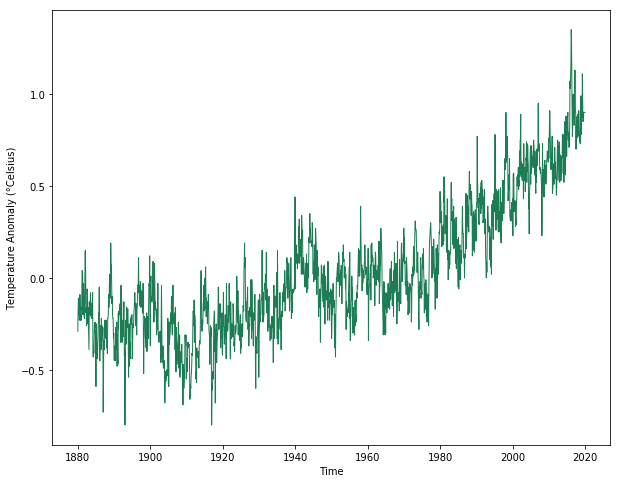

In [14]:
# Plot the data - quick and easy - using matplotlib, we will draw prettier graphs later

# Import Matplotlib
import matplotlib.pyplot as plt

# Allow for rendering within notebook
%matplotlib inline

# Create figure, title and plot data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t, color='#1C7C54', linewidth=1.0)

In [15]:
t.resample('A').mean().head()

,Avg_Anomaly_deg_C
date,
1880-12-31,-0.187500
1881-12-31,-0.100833
1882-12-31,-0.110000
1883-12-31,-0.191667
1884-12-31,-0.294167


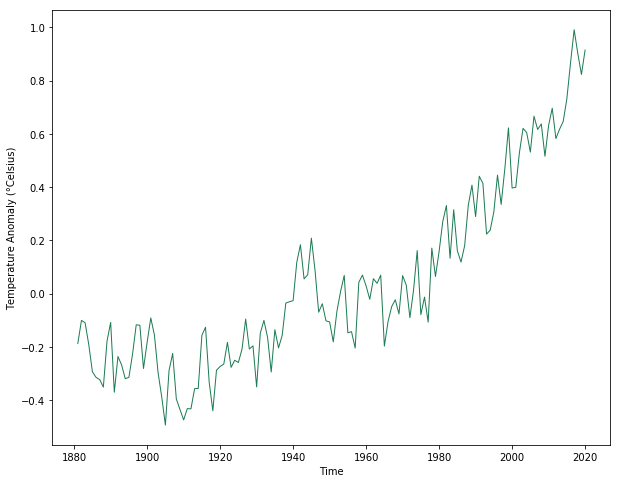

In [16]:
# Now lets visualize our resampled DataFrame

# Create figure, title and plot resampled data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t.resample('A').mean(), color='#1C7C54', linewidth=1.0)

In [17]:
# Define function to pull value from raw data, using DateIndex from new DataFrame row
def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value
  
# Select just the co2 emissions for the 'world', and the columns for the years 1960-2018 
raw_e_world = raw_e[raw_e['Country Name']=='World'].loc[:,'1960':'2018']

# 'Traspose' the resulting slice, making the columns become rows and vice versa
raw_e_world = raw_e_world.T
raw_e_world.columns = ['value']

# Create a new DataFrame with a daterange the same the range for.. 
# the Temperature data (after resampling to years)
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])

# Populate the new DataFrame using the values from the raw data slice
v = e.apply(lambda row: populate_df(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
e.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,3.099157
1961-12-31,3.070018
1962-12-31,3.140957
1963-12-31,3.245109
1964-12-31,3.361380


In [18]:
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,NaN
2016-12-31,NaN
2017-12-31,NaN
2018-12-31,NaN


In [19]:
e.fillna(method='ffill', inplace=True)
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,4.980707
2016-12-31,4.980707
2017-12-31,4.980707
2018-12-31,4.980707


In [20]:
e['1984-01-04':'1990-01-06']

,Global CO2 Emissions per Capita
date,
1984-12-31,4.024779
1985-12-31,4.074093
1986-12-31,4.124274
1987-12-31,4.152156
1988-12-31,4.226610
1989-12-31,4.243794


In [21]:
# Define function to pull value from raw data, using DateIndex from new DataFrame row
def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_india.loc[index]
    return value
  
# Select just the co2 emissions for the 'world', and the columns for the years 1960-2018 
raw_e_india = raw_e[raw_e['Country Name']=='India'].loc[:,'1960':'2018']

# 'Traspose' the resulting slice, making the columns become rows and vice versa
raw_e_india = raw_e_india.T
raw_e_india.columns = ['value']

# Create a new DataFrame with a daterange the same the range for.. 
# the Temperature data (after resampling to years)
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
ei = pd.DataFrame(date_rng, columns=['date'])

# Populate the new DataFrame using the values from the raw data slice
vi = ei.apply(lambda row: populate_df(row), axis=1)
ei['Global CO2 Emissions per Capita'] = vi
ei.set_index('date', inplace=True)
ei.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,0.267634
1961-12-31,0.283704
1962-12-31,0.305851
1963-12-31,0.321795
1964-12-31,0.308169


In [22]:
ei.fillna(method='ffill', inplace=True)
ei[ei.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,1.594668
2013-12-31,1.588600
2014-12-31,1.727671
2015-12-31,1.727671
2016-12-31,1.727671
2017-12-31,1.727671
2018-12-31,1.727671


##Plots

# Visualize Temperature Anomalies

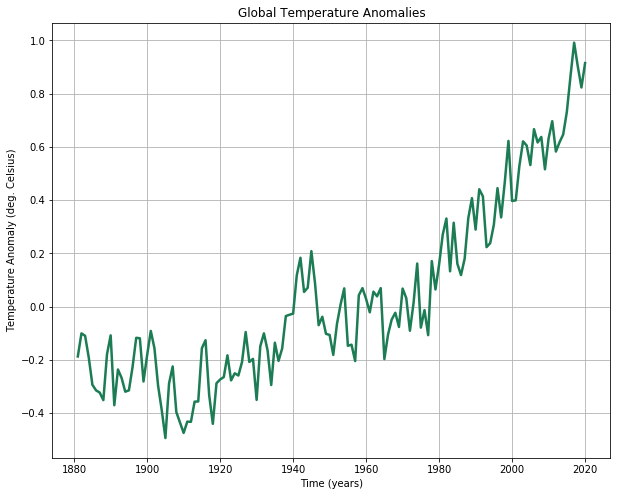

In [23]:
# import Matplotlib
import matplotlib.pyplot as plt
# Allow for graphs to be displayed in Jupyter notebook
%matplotlib inline

# Resample or temperature data to years (end-of-year)
t_resampled = t.resample('A').mean()

# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot temperature data with specific colour and line thickness
ax.plot(t_resampled, color='#1C7C54', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Temperature Anomaly (deg. Celsius)',
       title='Global Temperature Anomalies')

# Enable grid
ax.grid()

# CO2 Emission Plot

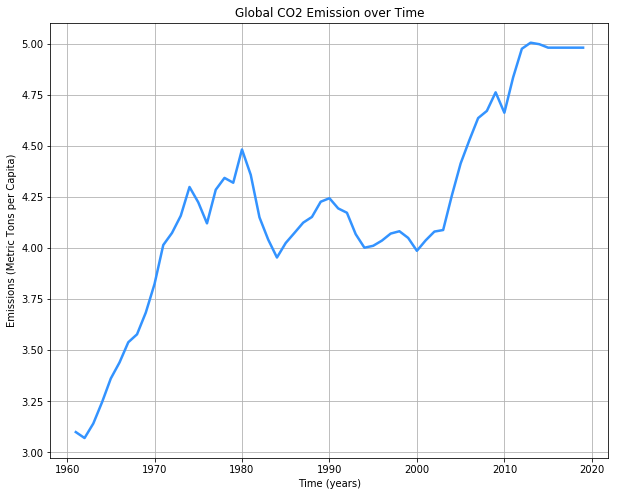

In [24]:
# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot co2 emissions data with specific colour and line thickness
ax.plot(e, color='#3393FF', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Emissions (Metric Tons per Capita)',
       title='Global CO2 Emission over Time')

# Enable grid
ax.grid()

# India's CO2 Emission over years

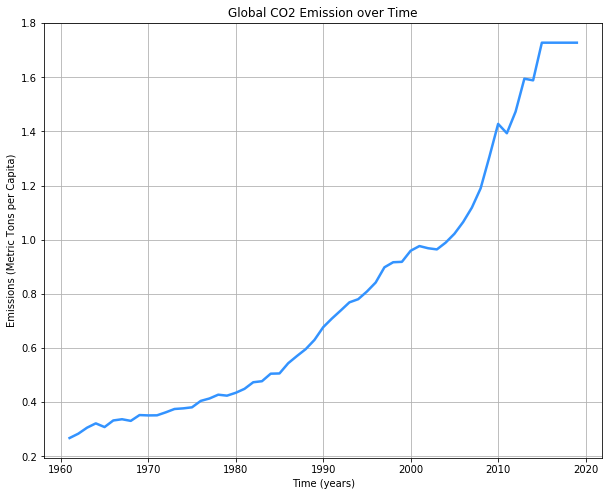

In [25]:
# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot co2 emissions data with specific colour and line thickness
ax.plot(ei, color='#3393FF', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Emissions (Metric Tons per Capita)',
       title='Global CO2 Emission over Time')

# Enable grid
ax.grid()

# Forecast using Prophet

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


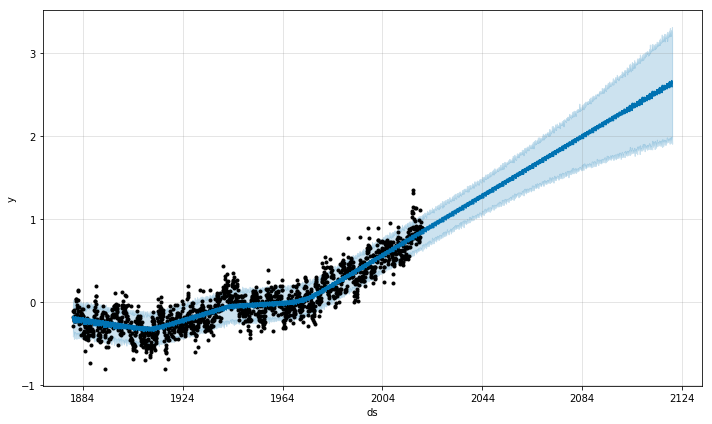

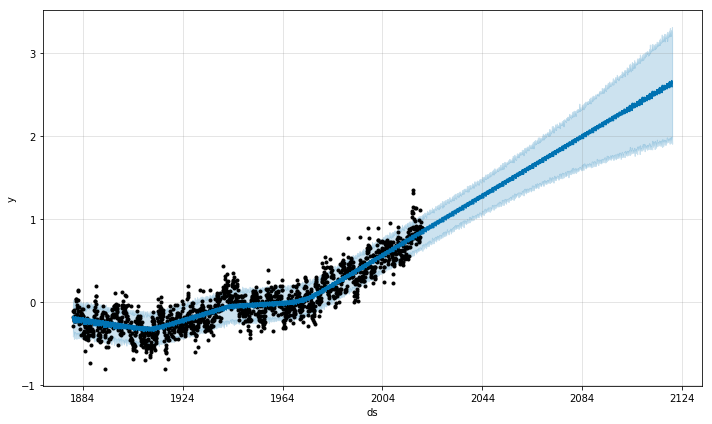

In [28]:
# Import Facebook's Prophet forecasting library
from fbprophet import Prophet

# Create a new DataFrame with which we will create/train our Prophet model 
t_prophet = pd.DataFrame()
t_prophet['ds'] = t.index
t_prophet['y'] = t['Avg_Anomaly_deg_C'].values

# Instantiate model and fit to data (just like with sklearn model API)
m = Prophet()
m.fit(t_prophet)

# Generate future dataframe containing predictions (we are doing this for 100 years into the future)
future = m.make_future_dataframe(freq='m', periods=100*12)
forecast = m.predict(future)

# Plot the resulting forecast
m.plot(forecast)

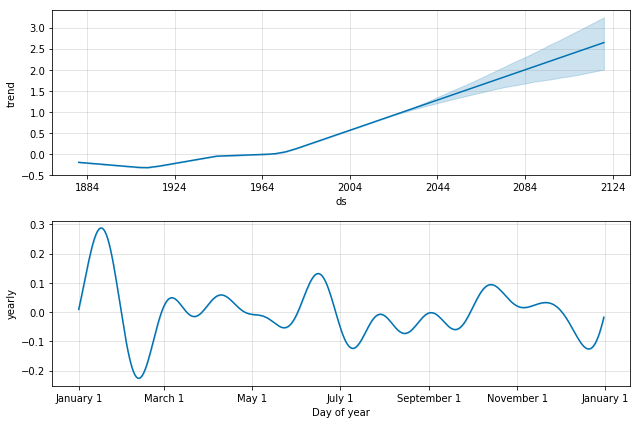

In [29]:
# Plot the forecast components
m.plot_components(forecast);